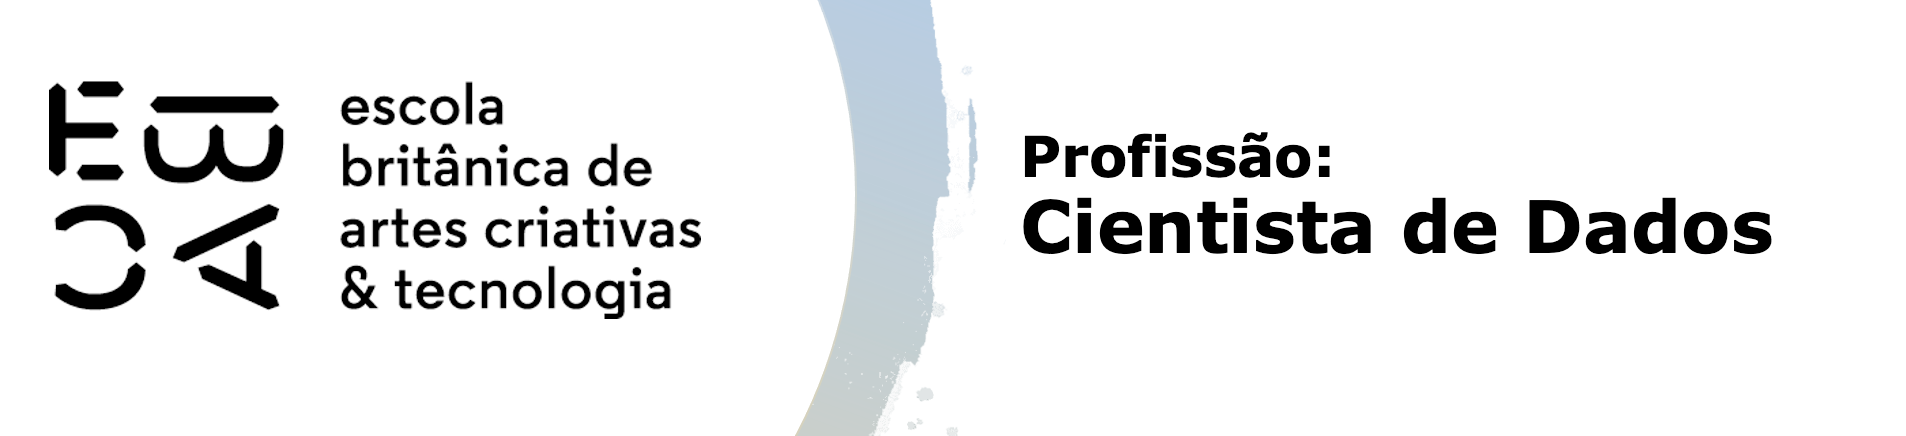

---

# **SQL para Análise de Dados**
## **Módulo 8** | SQL: Projeto


Aluna: [Aline Castro](https://www.linkedin.com/in/alinecastrosantos/)<br>

Data: Janeiro de 2024

---

# **Índice**

- [**0. Conjunto de dados**](#0.-Conjunto-de-dados)  

- [**1. Criação da tabela**](#1.-Criação-da-tabela)  

- [**2. Análise Exploratória dos dados**](#2.-Análise-Exploratória-dados)  

> - [2.1 Visualização](#2.1-Visualização-da-tabela)  

> - [2.2 Quantidade de linhas no dataset](#2.2-Quantidade-de-linhas-no-dataset)  

> - [2.3 Tipos de dados em cada coluna](#2.3-Tipos-de-dados-em-cada-coluna)  

> - [2.4 Categorias da variável *escolaridade*](#2.4.1-Categorias-da-variável-escolaridade)  
> - [2.5 Salários anuais únicos](#2.5-Salários_anuais_únicos)  
> - [2.6 Distribuição de Frequência por Categoria da Variável *sexo*](#2.6-variável-sexo)  

> - [2.7 Limite máximo de crédito de acordo com o tipo de cartão, sexo e escolaridade](#2.7-limite-credito)  
> - [2.8 Valor Máximo e Médio das Transações no Último Ano por Sexo](#2.8-max-medio-transacao)  
> - [2.9 Produtos e Transações por Sexo e Salário](#2.9-produto-transacao)  


- [**3. Conclusão**](#3.-Conclusão:)

# **0. Conjunto de dados**

O [conjunto de dados](https://raw.githubusercontent.com/rhatiro/exercicios-SQL-para-Analise-de-Dados-EBAC/main/Mo%CC%81dulo%208%20-%20Projeto%20Final/database/credito8.csv) utilizado neste projeto consiste em uma subamostra do [dataset original](https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/dataset/credito.csv) do professor [André Perez](https://www.linkedin.com/in/andremarcosperez/). É importante destacar que pode haver discrepâncias nas proporções das categorias nesta amostra parcial em relação ao conjunto de dados original. Essa subamostra foi extraída com o objetivo de facilitar o processamento dos dados para o projeto em questão. Para acessar o dataset completo, você pode visitar o repositório GitHub do professor [André Perez](https://github.com/andre-marcos-perez), disponível através do seguinte link: https://github.com/andre-marcos-perez/ebac-course-utils/blob/main/dataset/credito.csv

É válido ressaltar que as estimativas baseadas nesse conjunto de dados podem apresentar menor precisão em comparação com a amostra completa. Portanto, os resultados aqui apresentados não possuem a mesma fidelidade de uma análise realizada com o dataset completo. Eles são utilizados apenas para fins didáticos do curso e para demonstração pessoal no portfólio. No entanto, todas as *queries* podem ser igualmente aplicadas ao conjunto de dados original para obter conclusões confiáveis e úteis em análises mais aprofundadas.

Os dados fornecem informações sobre clientes de um banco e incluem as seguintes variáveis:

| Coluna                   | Descrição                                               | Tipo     |
| :----------------------- | :-----------------------------------------------------: | -------: |
| **idade**                | idade do cliente                                        | *int*    |
| **sexo**                 | sexo do cliente (F ou M)                                | *string* |
| **dependentes**          | número de dependentes do cliente                        | *int*    |
| **escolaridade**         | nível de escolaridade do clientes                       | *string* |
| **estado_civil**         | estado civil do cliente                                 | *string* |
| **salario_anual**        | faixa salarial do cliente                               | *string* |
| **tipo_cartao**          | tipo de cartao do cliente                               | *string* |
| **qtd_produtos**         | quantidade de produtos comprados nos últimos 12 meses   | *bigint* |
| **iteracoes_12m**        | quantidade de iterações/transacoes nos ultimos 12 meses | *int*    |
| **meses_inativo_12m**    | quantidade de meses que o cliente ficou inativo         | *int*    |
| **limite_credito**       | limite de credito do cliente                            | *float*  |
| **valor_transacoes_12m** | valor das transações dos ultimos 12 meses               | *float*  |
| **qtd_transacoes_12m**   | quantidade de transacoes dos ultimos 12 meses           | *int*    |

A tabela e as *queries* em linguagem SQL foram criadas através do [Amazon Athena](https://aws.amazon.com/pt/athena/) junto com o [Amazon Simple Storage Service (Amazon S3)](https://aws.amazon.com/pt/s3/).

[**Amazon Web Services**](https://aws.amazon.com/pt/), também conhecido como [**AWS**](https://aws.amazon.com/pt/), é uma plataforma de serviços de computação em nuvem, que formam uma plataforma de computação na nuvem oferecida pela Amazon.com.

[Voltar ao índice](#Índice)

In [9]:
# Import da biblioteca pandas para visualização dos arquivos CSV resultantes das queries
import pandas as pd

# **1. Criação da tabela**

A primeira etapa é a criação da tabela com o *dataset* armazenado no **Amazon S3 Bucket** por meio de uma *query* no **AWS Athena**, para posteriormente realizar as consultas.

```sql
CREATE EXTERNAL TABLE IF NOT EXISTS default.credito (
    `idade` int,
    `sexo` string,
    `dependentes` int,
    `escolaridade` string,
    `estado_civil` string,
    `salario_anual` string,
    `tipo_cartao` string,
    `qtd_produtos` bigint,
    `iteracoes_12m` int,
    `meses_inativo_12m` int,
    `limite_credito` float,
    `valor_transacoes_12m` float,
    `qtd_transacoes_12m` int
)
ROW FORMAT SERDE 'org.apache.hadoop.hive.serde2.lazy.LazySimpleSerDe'
WITH SERDEPROPERTIES (
    'serialization.format' = ',',
    'field.delim' = ','
)
LOCATION 's3://transacoes-ebac-projetofinal-aline/'
TBLPROPERTIES ('has_encrypted_data' = 'false');
```

# **2. Análise exploratória dos dados**

[Voltar ao índice](#Índice)

## 2.1 Visualização da tabela

> **Query 1:**

```sql
SELECT * FROM "default"."credito" limit 10;
```

In [24]:
df = pd.read_csv('https://raw.githubusercontent.com/Aline-Castro/Ciencia-de-Dados/main/SQL%20/08%20Projeto%20Final/QUERY1.csv')
df

,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,45,M,3,ensino medio,casado,$60K - $80K,blue,5,3,1,12691.51,1144.90,42
1,49,F,5,mestrado,solteiro,menos que $40K,blue,6,2,1,8256.96,1291.45,33
2,51,M,3,mestrado,casado,$80K - $120K,blue,4,0,1,3418.56,1887.72,20
3,40,F,4,ensino medio,na,menos que $40K,blue,3,1,4,3313.03,1171.56,20
4,40,M,3,sem educacao formal,casado,$60K - $80K,blue,5,0,1,4716.22,816.08,28
5,44,M,2,mestrado,casado,$40K - $60K,blue,3,2,1,4010.69,1088.07,24
6,51,M,4,na,casado,$120K +,gold,6,3,1,34516.72,1330.87,31
7,32,M,0,ensino medio,na,$60K - $80K,silver,2,2,2,29081.49,1538.32,36
8,37,M,3,sem educacao formal,solteiro,$60K - $80K,blue,5,0,2,22352.50,1350.14,24
9,48,M,2,mestrado,solteiro,$80K - $120K,blue,6,3,3,11656.41,1441.73,32


[Voltar ao índice](#Índice)

## 2.2 Quantidade de linhas no dataset

> **Query 2:**

```sql
SELECT COUNT(*) AS quantidade_linhas
FROM credito;
```

In [25]:
df = pd.read_csv('https://raw.githubusercontent.com/Aline-Castro/Ciencia-de-Dados/main/SQL%20/08%20Projeto%20Final/QUERY2.csv')
df

,quantidade_linhas
0,2564


O conjunto de dados da amostra contém 2.564 linha.

[Voltar ao índice](#Índice)

## 2.3 Tipos de dados em cada coluna

> **Query 3:**

```sql
DESCRIBE credito;
```

![query03](https://raw.githubusercontent.com/Aline-Castro/Ciencia-de-Dados/main/SQL%20/08%20Projeto%20Final/QUERY3.png)

> Os tipos dos dados no *dataset* podem ser descritos como:
> - `int` representa dados do tipo inteiro (numérico);
> - `string` representa dados do tipo texto ou cadeia de caracteres;
> - `bigint` representa dados do tipo inteiro longo (um número inteiro maior do que o tipo int);
> - `float` representa dados do tipo número de ponto flutuante (um número com parte fracionária).

[Voltar ao índice](#Índice)

## 2.4 Categorias da variável `escolaridade`

> **Query 4:**

```sql
SELECT DISTINCT escolaridade
FROM credito;
```

In [26]:
df = pd.read_csv('https://raw.githubusercontent.com/Aline-Castro/Ciencia-de-Dados/main/SQL%20/08%20Projeto%20Final/QUERY4.csv')
df

,escolaridade
0,sem educacao formal
1,ensino medio
2,na
3,mestrado
4,graduacao
5,doutorado


> Podemos notar que há valores **nulos/ausentes** na variável categórica `escolaridade`, representados pelo valor **`na`**.

[Voltar ao índice](#Índice)

## 2.5 Salários anuais únicos

> **Query 5:**

```sql
SELECT count(*), salario_anual
FROM credito
GROUP BY salario_anual

```

In [27]:
df = pd.read_csv('https://raw.githubusercontent.com/Aline-Castro/Ciencia-de-Dados/main/SQL%20/08%20Projeto%20Final/QUERY5.csv')
df

,_col0,salario_anual
0,488,$80K - $120K
1,701,menos que $40K
2,235,na
3,451,$60K - $80K
4,467,$40K - $60K
5,222,$120K +


> Também podemos notar a presença de valores nulos

[Voltar ao índice](#Índice)

## 2.6 Distribuição de Frequência por Categoria da Variável `sexo`

> **Query 6:**

```sql
SELECT count(*), sexo
FROM credito
GROUP BY sexo;
```



In [28]:
df = pd.read_csv('https://raw.githubusercontent.com/Aline-Castro/Ciencia-de-Dados/main/SQL%20/08%20Projeto%20Final/QUERY6.csv')
df

,_col0,sexo
0,1563,M
1,1001,F


> Há 1563 homens (M) e 1001 mulheres (F)

[Voltar ao índice](#Índice)

## 2.7 Limite máximo de crédito de acordo com o tipo de cartão, sexo e escolaridade

> **Query 7:**

```sql
SELECT max(limite_credito) as limite_credito, escolaridade, tipo_cartao, sexo
FROM credito
WHERE escolaridade != 'na' and tipo_cartao != 'na'
GROUP BY escolaridade, tipo_cartao, sexo
ORDER BY limite_credito desc
limit 10

```

In [29]:
df = pd.read_csv('https://raw.githubusercontent.com/Aline-Castro/Ciencia-de-Dados/main/SQL%20/08%20Projeto%20Final/QUERY7.csv')
df

,limite_credito,escolaridade,tipo_cartao,sexo
0,34516.99,sem educacao formal,blue,M
1,34516.98,mestrado,gold,M
2,34516.97,mestrado,blue,M
3,34516.96,sem educacao formal,silver,M
4,34516.96,doutorado,platinum,F
5,34516.95,ensino medio,gold,M
6,34516.94,graduacao,gold,M
7,34516.94,graduacao,gold,F
8,34516.89,graduacao,silver,M
9,34516.74,ensino medio,blue,M


Com base nos resultados da consulta, nota-se que:

1. O maior limite de crédito é de **\$34516.99**, que pertence a um homem com um cartão azul e sem educação formal.
2. Os homens parecem ter limites de crédito mais altos em geral, pois ocupam 8 dos 10 lugares superiores.
3. A educação formal não parece ser um fator determinante para o limite de crédito, já que a pessoa com o maior limite de crédito não tem educação formal.
4. O tipo de cartão também não parece ser um fator determinante para o limite de crédito, pois todos os tipos de cartão (azul, ouro, prata e platina) estão presentes nos 10 principais.
5. A única mulher na lista tem um doutorado e um cartão de platina, sugerindo que, para as mulheres, um nível mais alto de educação e um tipo de cartão superior podem estar correlacionados com um limite de crédito mais alto.


[Voltar ao índice](#Índice)

## 2.8 Valor Máximo e Médio das Transações no Último Ano por Sexo

> **Query 8:**

```sql
SELECT max(valor_transacoes_12m) AS maior_valor_gasto, avg(valor_transacoes_12m) AS media_valor_gasto
FROM credito
GROUP BY sexo
```

In [30]:
df = pd.read_csv('https://raw.githubusercontent.com/Aline-Castro/Ciencia-de-Dados/main/SQL%20/08%20Projeto%20Final/QUERY8.csv')
df

,maior_valor_gasto,media_valor_gasto
0,4776.58,1839.6226
1,4686.93,1807.9680


* Para o sexo representado pelo código 0 (MASCULINO):<br>
 o valor máximo gasto em transações no último ano foi de R$4776.58, e o valor médio gasto foi de 1839.62 reais.<br>

* Para o sexo representado pelo código 1 (FEMININO): <br>
o valor máximo gasto em transações no último ano foi de R$4686.93, e o valor médio gasto foi de 1807.96 reais.

[Voltar ao índice](#Índice)

## 2.9 Produtos e Transações por Sexo e Salário

> **Query 9:**

```sql
SELECT sexo, salario_anual,  AVG(qtd_produtos) AS qts_produtos, AVG(valor_transacoes_12m) AS media_valor_transacoes
FROM credito
WHERE salario_anual != 'na'
GROUP BY sexo, salario_anual
ORDER BY AVG(valor_transacoes_12m) DESC


```

In [31]:
df = pd.read_csv('https://raw.githubusercontent.com/Aline-Castro/Ciencia-de-Dados/main/SQL%20/08%20Projeto%20Final/QUERY9.csv')
df

,sexo,salario_anual,qts_produtos,media_valor_transacoes
0,M,menos que $40K,4.394231,1963.6719
1,M,$40K - $60K,4.291971,1878.2974
2,F,menos que $40K,4.408710,1845.1332
3,M,$60K - $80K,4.352550,1818.6364
4,F,$40K - $60K,4.440415,1781.4299
5,M,$80K - $120K,4.329918,1755.2499
6,M,$120K +,4.328829,1701.4652


[Voltar ao índice](#Índice)

# **3. Conclusão:**

Com base nos dados apresentados, podemos concluir que:

- Independentemente do sexo ou da faixa salarial, a quantidade média de produtos adquiridos é bastante semelhante, variando entre **4.3** e **4.4**. Isso sugere que o número de produtos adquiridos não é fortemente influenciado pelo sexo ou pela faixa salarial.
- Homens com salários anuais **menores que \$40K** têm o valor médio de transações mais alto (**R\$1963.6719**), enquanto homens com salários anuais de **\$120K +** têm o valor médio de transações mais baixo (**R\$1701.4652**). Isso é contraintuitivo, pois poderíamos esperar que indivíduos com salários mais altos gastassem mais.
- Mulheres tendem a gastar menos em média do que os homens, independentemente da faixa salarial. No entanto, as mulheres na faixa salarial de **\$40K - \$60K** têm a maior quantidade média de produtos (**4.440415**).
- A faixa salarial parece ter um impacto maior no valor médio das transações do que o sexo.

[Voltar ao índice](#Índice)

---